# 1.Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# 2. Import Data 

In [2]:
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 3.Data Understanding

##  3.1 Initital Analysis

In [3]:
dataset.shape

(21, 2)

In [4]:
dataset.isin

<bound method DataFrame.isin of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [5]:
dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

## 3.2 Assumption Check with Data Visualization 

Check Linearity Test 

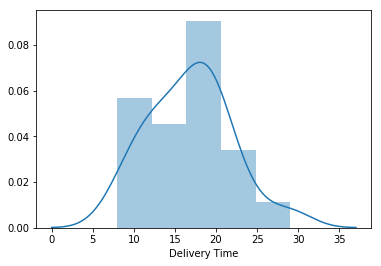

In [6]:
sns.distplot(dataset['Delivery Time'])
plt.show()

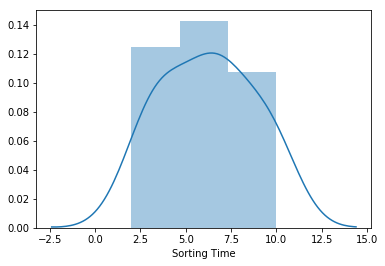

In [7]:
sns.distplot(dataset['Sorting Time'])
plt.show()

# Feature engineering 

In [8]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis 

In [9]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


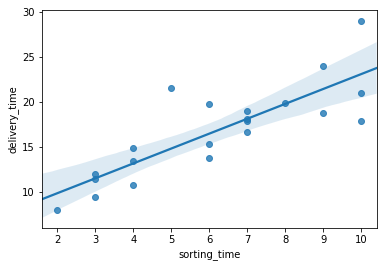

In [10]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# Model Building & Model Training

In [11]:
model=smf.ols(formula="delivery_time~sorting_time",data=dataset).fit()
model

# Model Testing 

In [12]:
# Finding Slopes & Intercepts
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

# Model Predictions 

In [13]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [14]:
# Automatic Prediction for say sorting time 8,10
new_data=pd.Series([8,10])
new_data

0     8
1    10
dtype: int64

In [15]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,8
1,10


In [16]:
model.predict(data_pred)

0    19.774893
1    23.072933
dtype: float64

## Note: I Used EDA and Data Visualization, Feature Engineering, Correlation Analysis, Model Building, Model Testing and Model Predictions using simple linear regression.